<a href="https://colab.research.google.com/github/Hotckiss/image_analysis/blob/master/Copy_of_hw1_hse_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание №1


Задание присылать на обе почты почты **aleksartamonov@gmail.com**  **dashkov.alexander.om@gmail.com** в виде ссылки на colab

В теме письма указать ***HSE2020 HW1 <Фамилия Имя>***

soft deadline: 02.02.2020T23:59:00+0300

hard deadline: 09.02.2020T23:59:00+0300

## Теоретический блок

##### Задача 1 (3 балла)

Когда Вы заходите в темную комнату из светлого помещения, то проходит некоторое время, прежде чем Вы станете видеть достаточно хорошо, чтобы различить очертания предметов. Какая из обсуждавшихся на лекции особенностей зрительного восприятия человека объясняет это явление? Какой процесс происходит в зрительной системе?



> Indented block



##### Задача 2 (3 балла)

Рассмотрим некоторое цветовое пространство $R_{new}G_{new}B_{new}$, получающееся из исходного RGB по правилу:

$$
R_{new} = a_{11}R+a_{12}G+a_{13}B+a_{14}\\
G_{new} = a_{21}R+a_{22}G+a_{23}B+a_{24}\\
B_{new} = a_{31}R+a_{32}G+a_{33}B+a_{34}
$$

где R, G и B – вещественные числа от 0 до 1. 

Какими свойствами должны обладать коэффициенты $a_{ij}$, чтобы можно было без потерь информации переходить из одного пространства в другое и обратно?
(*) Какими свойствами должны обладать коэффициенты $a_{ij}$ , чтобы вещественные числа $R_{new},G_{new}$ и $B_{new}$ тоже лежали внутри куба со стороной 1 и полностью плотно его заполняли?

## Практический блок

In [0]:
import cv2
import matplotlib.pylab as plt
%matplotlib inline

import numpy as np

##### Задача 3 (3 балла)

Загрузите изображение *lena.jpg* в переменную **lena**. Отобразите результат на экран.

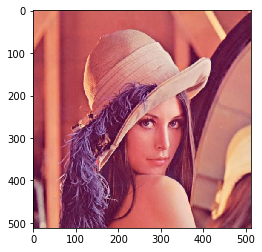

In [3]:
lena = cv2.imread('lena.jpg')
lena_rgb = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)
plt.imshow(lena_rgb)

##### Задача 4 (3 балла)

Поменяйте местами левую верхнюю и правую нижнюю четвертинки изображения **lena** и отобразите результат на экран.

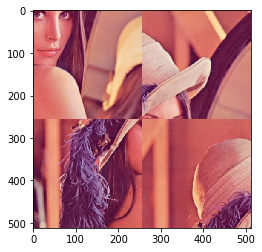

In [4]:
lena_rgb_copy = lena_rgb.copy()
tmp = lena_rgb_copy[:256,:256].copy()
lena_rgb_copy[:256,:256] = lena_rgb_copy[256:,256:]
lena_rgb_copy[256:,256:] = tmp
plt.imshow(lena_rgb_copy)

##### Задача 5 (3 балла)

Усредните значения всех трех цветовых каналов **lena** в каждый из каналов итогового изображения **lena_gray_my**.

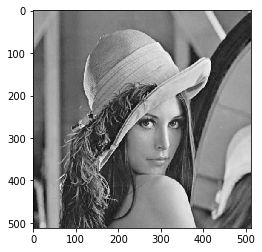

In [5]:
lena_gray_my = lena.mean(axis=2)
plt.imshow(lena_gray_my, cmap='gray')

##### Задача 6 (3 балла)

Переведите исходное цветное изображение **lena** в изображение в градациях серого с помощью функции cvtColor. (**lena_gray_cvt**). Вычислите модуль разности между изображениями **lena_gray_my** и **lena_gray_cvt** и отобразите ее на экране.

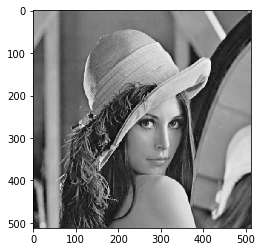

In [6]:
lena_gray_cvt = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
plt.imshow(lena_gray_cvt, cmap='gray')

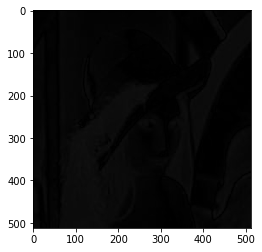

In [8]:
delta = np.abs(lena_gray_my - lena_gray_cvt)
plt.imshow(delta, cmap='gray', vmin=0, vmax=255)

##### Задача 7 (3 балла)

Переведите исходное изображение **lena** из RGB в HSV. Установите значения S и V в максимум для всех пикселей изображения. Полученное изображение переведите обратно в RGB. Отобразите результат.

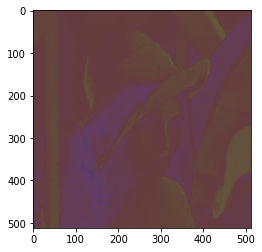

In [9]:
lena_hsv = cv2.cvtColor(lena, cv2.COLOR_BGR2HSV)
lena_hsv[:,:,1:] = np.full((512, 512, 2), 100)
plt.imshow(cv2.cvtColor(lena_hsv, cv2.COLOR_HSV2RGB))

##### Задача 8 (3 балла)
Переведите изображение **lena** в одно из цветовых пространств (cvtColor) с выделенной координатой яркости (HSV, HSL, HSB, CIE Lab), инвертируйте яркостную составляющую, переведите обратно в RGB. Отобразите результат.

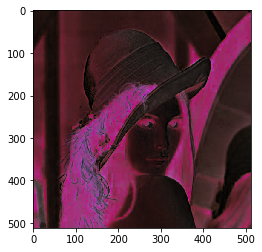

In [10]:
lena_hsv = cv2.cvtColor(lena, cv2.COLOR_BGR2HSV)
lena_hsv[:,:,2] = 1 - lena_hsv[:,:,2]
plt.imshow(cv2.cvtColor(lena_hsv, cv2.COLOR_HSV2RGB))

##### Задача 9 (3 балла)

По цветному изображению **lena** на входе сгенерируйте 6 цветных изображений, полученных путем перестановки значений цветовых каналов r, g и b. исходного изображения. Соберите коллаж $3x2$ и отобразите его на экране. 

Text(0.5, 1.0, 'RGB')

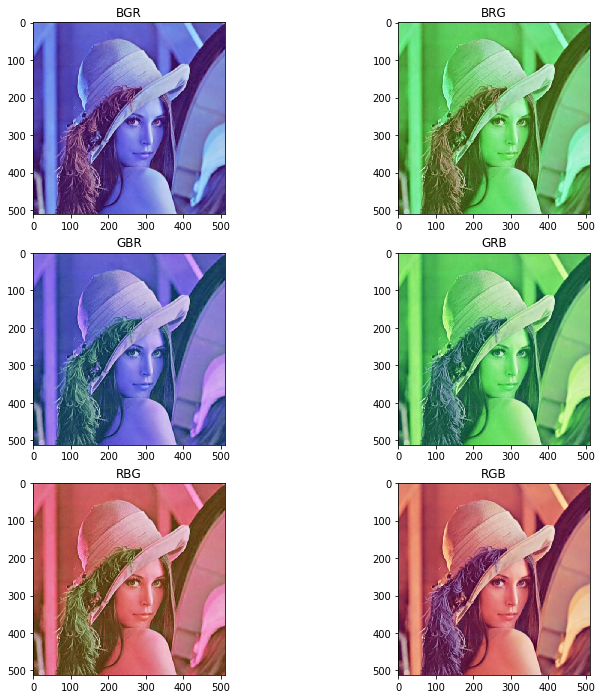

In [11]:
bgr_lena = lena.copy()
brg_lena = bgr_lena[:,:,[0,2,1]]
gbr_lena = bgr_lena[:,:,[1,0,2]]
grb_lena = gbr_lena[:,:,[0,2,1]]
rbg_lena = brg_lena[:,:,[1,0,2]]
rgb_lena = rbg_lena[:,:,[0,2,1]]

f, axarr = plt.subplots(3,2)
f.set_figheight(12)
f.set_figwidth(12)
axarr[0,0].imshow(bgr_lena)
axarr[0,1].imshow(brg_lena)
axarr[1,0].imshow(gbr_lena)
axarr[1,1].imshow(grb_lena)
axarr[2,0].imshow(rbg_lena)
axarr[2,1].imshow(rgb_lena)
axarr[0,0].set_title('BGR')
axarr[0,1].set_title('BRG')
axarr[1,0].set_title('GBR')
axarr[1,1].set_title('GRB')
axarr[2,0].set_title('RBG')
axarr[2,1].set_title('RGB')

##### Задача 10 (3 балла)
Переведите изображение **lena** из RGB в CIE Lab при помощи встроенной функции OpenCV. Загрузите исходное иображение еще раз и переведите из RGB в CIE Lab самостоятельно с помощью формул (google it). Сравните полученные изображения, построив разницу между ними. (Должен получится ~0)

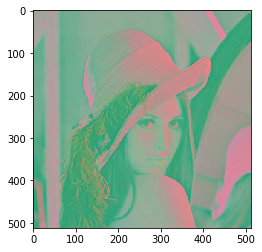

In [12]:
lena_cie_cvt = cv2.cvtColor(lena, cv2.COLOR_BGR2LAB)
plt.imshow(lena_cie_cvt)

In [0]:
def fix_comp_rgb(c):
    if c > 0.04045:
        return ((c + 0.055) / 1.055) ** 2.4
    return c / 12.92

In [0]:
def fix_comp_xyz(c):
    if c > 0.008856:
        return c ** (1.0 / 3)
    return (7.787 * c) + 16.0 / 116

In [0]:
lena_cie = np.zeros((512, 512, 3), dtype=np.uint8)
for i in range(512):
    for j in range(512):
        bgr = lena[i, j]
        b = fix_comp_rgb(bgr[0] / 255.0)
        g = fix_comp_rgb(bgr[1] / 255.0)
        r = fix_comp_rgb(bgr[2] / 255.0)

        X = fix_comp_xyz((r * 0.4124 + g * 0.3576 + b * 0.1805) / 0.95047)
        Y = fix_comp_xyz((r * 0.2126 + g * 0.7152 + b * 0.0722) / 1.0)
        Z = fix_comp_xyz((r * 0.0193 + g * 0.1192 + b * 0.9505) / 1.08883)

        lena_cie[i, j] = [(116 * Y - 16) * 2.55, 500 * (X - Y) + 128, 200 * (Y - Z) + 128]

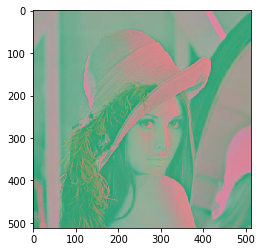

In [22]:
plt.imshow(lena_cie)

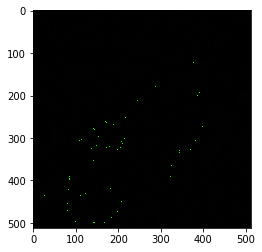

In [23]:
diff = np.abs(lena_cie_cvt - lena_cie)
plt.imshow(diff)